# Titanic: Machine Learning from Disaster

설명 및 데이터 원본 : https://www.kaggle.com/c/titanic

Pridict survival on the Titanic

- Defining the provlem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Feature selection
- Modeling
- Testing

In [89]:
import seaborn as sns
import pandas as pd
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Defining the provlem statement

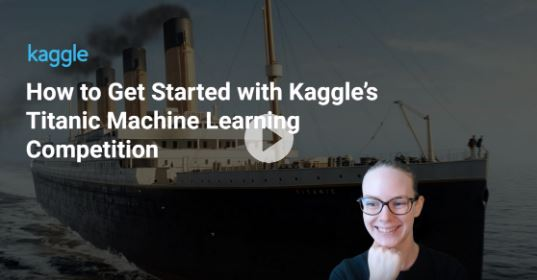

In [90]:
from IPython.display import Image
Image("./images/titanic.jpg")

In [91]:
캐글 링크 참조해서 description 추가

SyntaxError: invalid syntax (<ipython-input-91-3aa5a41ff75c>, line 1)

# 2. Collecting the data

In [92]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 3. Exploratory data analysis

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary

- Passengerid : 승객 아이디
- Survived : 생존 여부
- Pclass : 등급
- Name : 성함
- Sex : 성별
- Age : 나이
- SibSp : 형제, 자매, 배우자 수
- Parch : 부모, 자식 수
- Ticket : 티켓번호
- Fare : 요금
- Cabin : 좌석번호
- Embarked : 탑승 항구

In [94]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
train.shape

(891, 12)

In [96]:
test.shape

(418, 11)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
결측치 분석

SyntaxError: invalid syntax (<ipython-input-99-e79107014253>, line 1)

In [100]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Bar Chart for Categoricla Features

- Pclass
- Sex
- SibSp
- Parch
- Embarked

In [102]:
def bar_chart(feature) : 
    survived = train[train['Survived']==1][feature].value_counts()  # 생존자의 feature매개변수(칼럼) 값을 합산하여 변수에 저장
    dead = train[train['Survived']==0][feature].value_counts() # 위와같은 방식으로 사망자 총합을 변수에 저장
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))  # stacked는 누적 그래프 명령어. False로 주면 옆에 붙어서 나옴

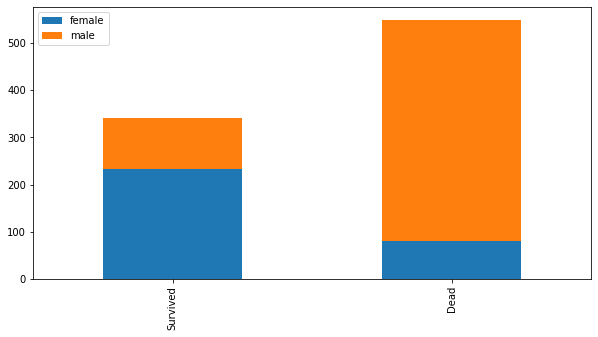

In [103]:
bar_chart('Sex')

해석 : 생존자 중 여성의 비율이 훨씬 높았다.

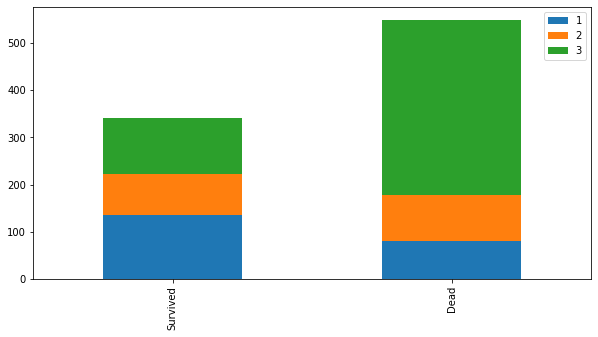

In [104]:
bar_chart('Pclass')

In [105]:
해석 : 등급에 따른 생존률이 달랐다.

SyntaxError: invalid syntax (<ipython-input-105-2552b4edb9fb>, line 1)

In [ ]:
bar_chart('SibSp')

In [ ]:
bar_chart('Parch')

In [ ]:
bar_chart('Embarked')

# 4. Feature engineering

In [ ]:
train.head()

In [106]:
컬럼들을 피처로 보면된다.
피처들을 백터(숫자들의 배열)로 만들어줘야한다. 

따라서 올바른 머신러닝 분석을 위해
1. 문자 속성을 가진 칼럼은 숫자로 바꿔준다.
2. NaN 값을 처리한다.

SyntaxError: invalid syntax (<ipython-input-106-dc1f1908572b>, line 1)

# 4.2 Name

In [107]:
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2
5,897,3,0,0.0,0,0,7538,0.0,2.0,0,0
6,898,3,1,2.0,0,0,330972,0.0,2.0,2,1
7,899,2,0,1.0,1,1,248738,1.0,2.0,0,0
8,900,3,1,1.0,0,0,2657,0.0,2.0,1,2
9,901,3,0,1.0,2,0,A/4 48871,1.0,2.0,0,0


In [108]:
두번째 질문은 정규식(regular expression)을 사용한 것인데요, 
공백이 있고 Mr, Mrs, Miss 있고, 
또 이름이 나오는 패턴에서 Mr, Mrs, Miss만 추출한다고 보시면 될 거 같습니다.

SyntaxError: invalid syntax (<ipython-input-108-a1b911a4fd50>, line 1)

In [109]:
train_test_data = [train, test]  # 두 데이터 프레임이 리스트의 형태로 합쳐져서 담김

for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
# expand=False 꼭 써야하나?

In [110]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [111]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Capt          1
Mme           1
Sir           1
Lady          1
Ms            1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [112]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [113]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [115]:
어떻게 자동으로 Title 칼럼이 추가된건지 이해가 안된다. - 걍 이해하려하지 말자..

SyntaxError: invalid syntax (<ipython-input-115-8e718ea7866c>, line 1)

In [116]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3, "Col":3, "Jonkheer":3, "Dona":3, 
                 "Mme":3, "Ms":3, "Lady":3, "Don":3, "Countess":3, "Sir":3, "Capt":3}

for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [118]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


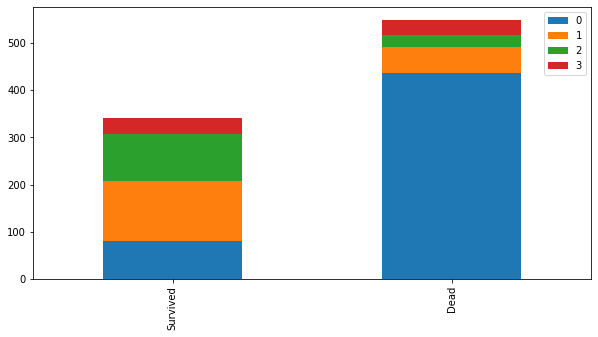

In [119]:
bar_chart('Title')

In [120]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [121]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [122]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0


# 4.3 Sex

In [123]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data : 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [124]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,NaN,S,0


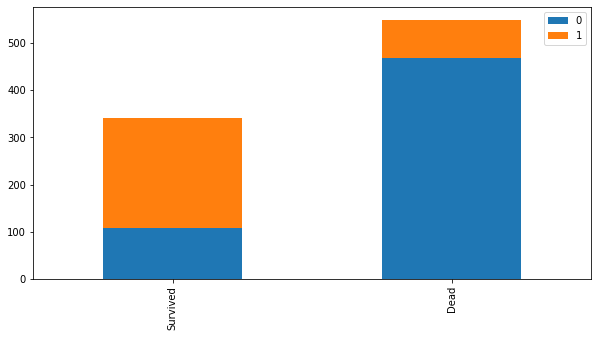

In [125]:
bar_chart('Sex')

# 4.4 Age

In [126]:
train['Age'].isnull().sum()

177

In [127]:
# 굳이 transform을 쓰는 이유가 뭐야
# train['Age'].fillna(train.groupby('Title')['Age'].median(), inplace=True)
# test['Age'].fillna(test.groupby('Title')['Age'].median(), inplace=True)

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [128]:
이런 방식도 있음

# for dataset in train_and_test:
# ​    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
# ​    dataset['Age'] = dataset['Age'].astype(int)
# ​    train['AgeBand'] = pd.cut(train['Age'], 5)
# print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

SyntaxError: invalid syntax (<ipython-input-128-0f5dee9a01e1>, line 1)

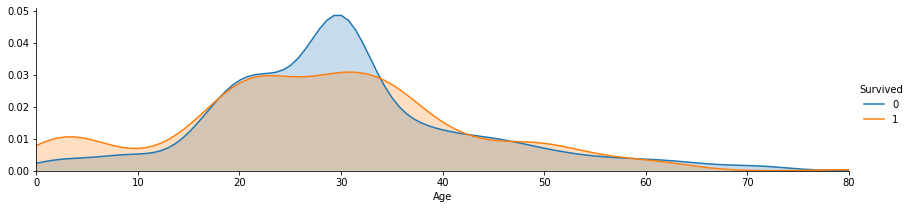

In [129]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect는 가로 길이
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

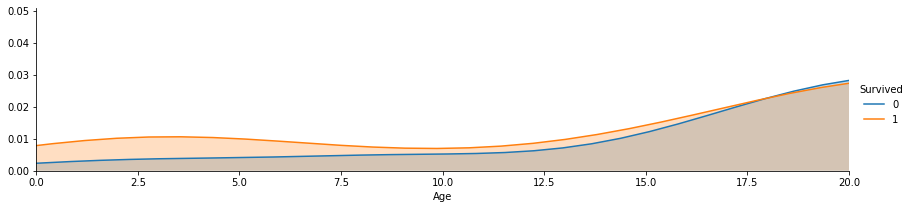

In [130]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect는 가로 길이
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

plt.show()

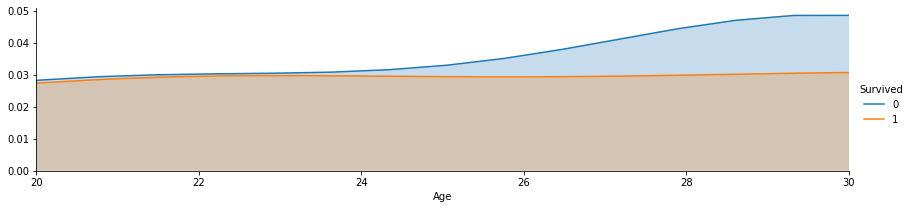

In [131]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect는 가로 길이
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

plt.show()

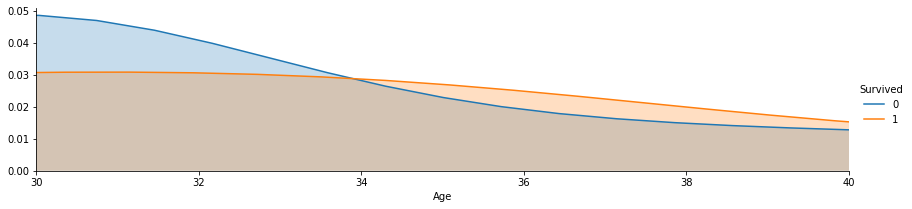

In [132]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect는 가로 길이
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

plt.show()

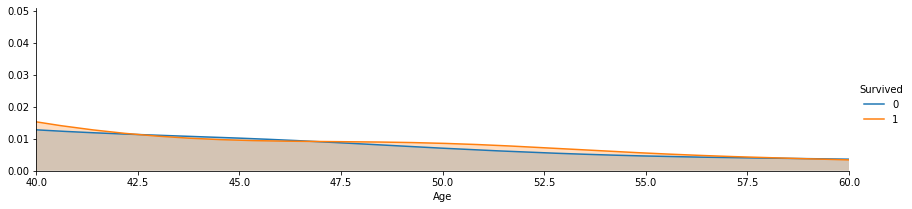

In [133]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) #aspect는 가로 길이
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

plt.show()

(60, 80.0)

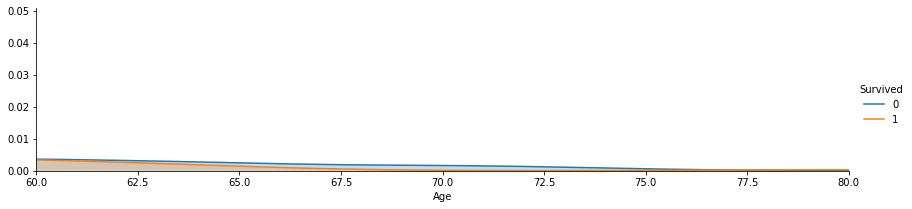

In [134]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [137]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [138]:
# for dataset in train_and_test:
# ​    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
# ​    dataset['Age'] = dataset['Age'].astype(int)
# ​    train['AgeBand'] = pd.cut(train['Age'], 5)
# print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

In [139]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


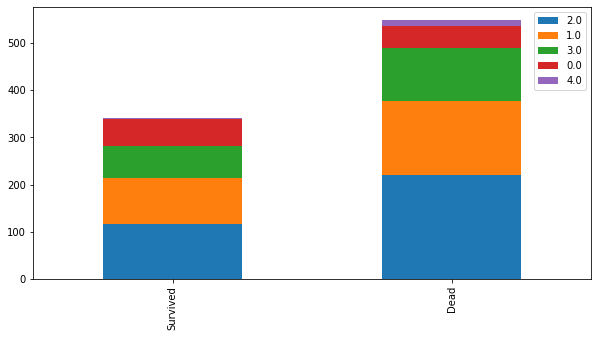

In [140]:
bar_chart('Age')

# 4.5 Embarked

4.5.1 filling missing values

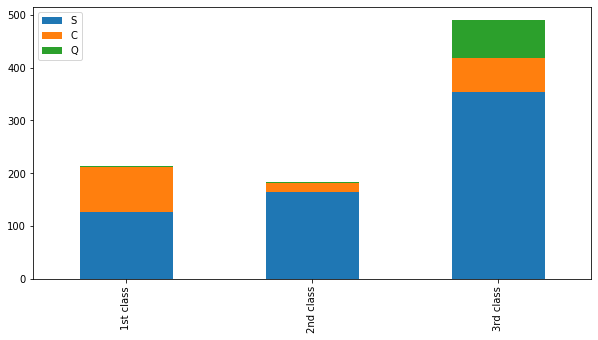

In [141]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class'] #데이터 프레임의 인덱스(1열)지정. 이는 곧 차트의 축명이 된다.
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [142]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [143]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [144]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# 4.6 Fare

In [145]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


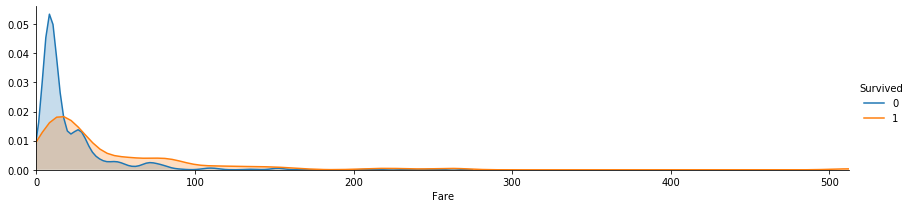

In [146]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

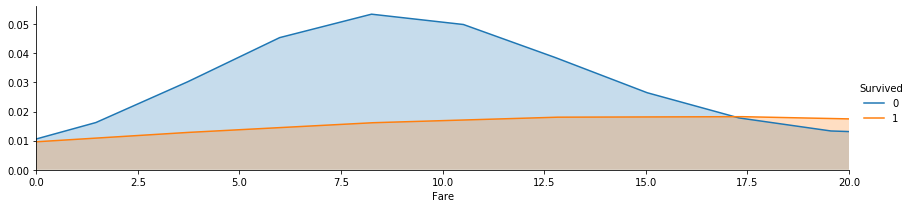

In [147]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

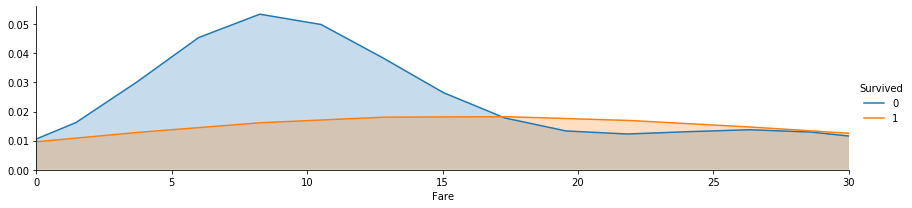

In [148]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

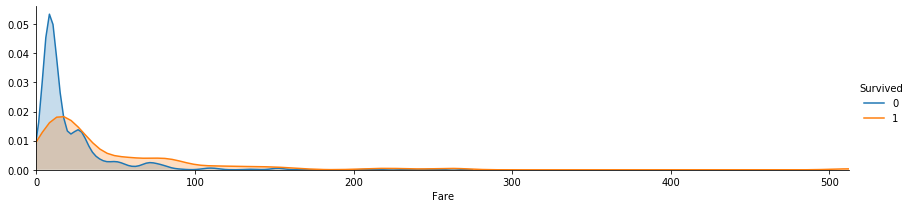

In [149]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [150]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [151]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


# 4.7 Cabin

In [152]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
E101           3
D              3
C22 C26        3
C68            2
C124           2
B20            2
D35            2
C83            2
D20            2
E33            2
D36            2
C52            2
E67            2
C123           2
D26            2
E25            2
B51 B53 B55    2
C126           2
D17            2
C125           2
B58 B60        2
E8             2
D33            2
E121           2
C93            2
              ..
B41            1
C49            1
C85            1
C104           1
D21            1
A34            1
D37            1
D49            1
B4             1
B3             1
E34            1
E50            1
C47            1
C99            1
B37            1
D48            1
D19            1
B38            1
C54            1
D47            1
D45            1
B80            1
A26            1
A16            1
B71            1
C50            1
E38            1
E77           

In [153]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

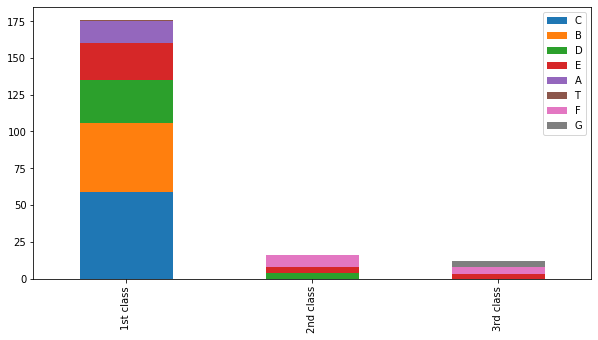

In [154]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [155]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    
# 각 성별로 0,1,2,3 .... 의 격차로 숫자를 부여할 경우 다른 0과 1의 숫자보다 더 큰 차이로 인식함.

In [156]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# 4.8 FamilySize

In [159]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0, 11.0)

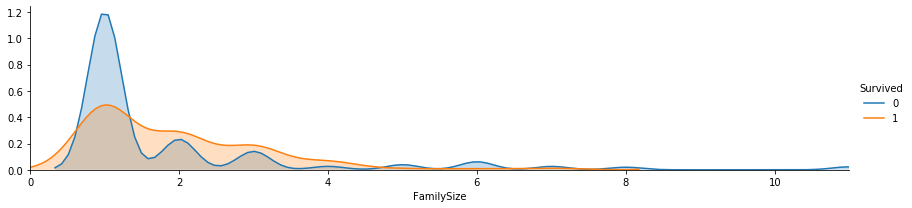

In [160]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [161]:
# 혼자 탄 사람은 많이 죽었지만, 가족이 한 명이라도 있는 경우 사망율이 많이 저하 됨.

In [163]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4.0}
for dataset in train_test_data :
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [165]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [166]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


In [174]:
features_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

KeyError: "['Ticket' 'SibSp' 'Parch'] not found in axis"

In [178]:
train = train.drop(['PassengerId'], axis=1) #왜 test 에선 PassengerId를 제거하지 않을까??

KeyError: "['PassengerId'] not found in axis"

In [175]:
train_data = train.drop('Survived', axis=1)
target = train['Survived'] # 타겟 중요!!

train_data.shape, target.shape

((891, 8), (891,))

# 5.Modeling

In [180]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


# 6.2 Cross Validation (K-fold)

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


from sklearn.utils import shuffle

In [186]:
# One-hot-encoding for categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [187]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [189]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [190]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

C:\Users\44455\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\44455\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy :  82.15 %
Accuracy :  83.95 %
Accuracy :  84.4 %
Accuracy :  90.01 %
Accuracy :  78.9 %


In [191]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)